<a href="https://colab.research.google.com/github/dushyant-mishra/Causal_impact/blob/main/Elon_Musk's_twitter_take_over_causal_analysis_using_causalpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import causalpy as cp
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [86]:
# Read in the data
data = pd.read_csv(r'/content/multiTimeline.csv')

data

,Day,twitter,linkedin,instagram,tiktok
0,5/13/2022,57,18,55,22
1,5/14/2022,54,10,59,24
2,5/15/2022,54,9,61,22
3,5/16/2022,55,19,59,21
4,5/17/2022,54,22,55,23
...,...,...,...,...,...
178,11/7/2022,66,17,50,23
179,11/8/2022,61,20,48,25
180,11/9/2022,61,18,47,20
181,11/10/2022,63,19,50,23


In [87]:
# Datetime to index 
data.index = pd.to_datetime(data['Day'])
data = data.drop('Day', axis=1)

In [88]:
data

,twitter,linkedin,instagram,tiktok
Day,,,,
2022-05-13,57,18,55,22
2022-05-14,54,10,59,24
2022-05-15,54,9,61,22
2022-05-16,55,19,59,21
2022-05-17,54,22,55,23
...,...,...,...,...
2022-11-07,66,17,50,23
2022-11-08,61,20,48,25
2022-11-09,61,18,47,20


In [82]:
#data.columns = data.columns.str.replace("twitter()", "twitter")

<ipython-input-82-26828c1db70a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace("twitter()", "twitter")


In [92]:
# Get the treatment time index
treatment_index = pd.to_datetime('2022-10-27')

# Build the model
model = cp.pymc_models.WeightedSumFitter()

In [93]:
# Define the model
formula = 'twitter ~ 0 +	linkedin +	instagram +	tiktok'

# Run the experiment
results = cp.pymc_experiments.SyntheticControl(
    data,
    treatment_index,
    formula=formula,
    model=model,
)

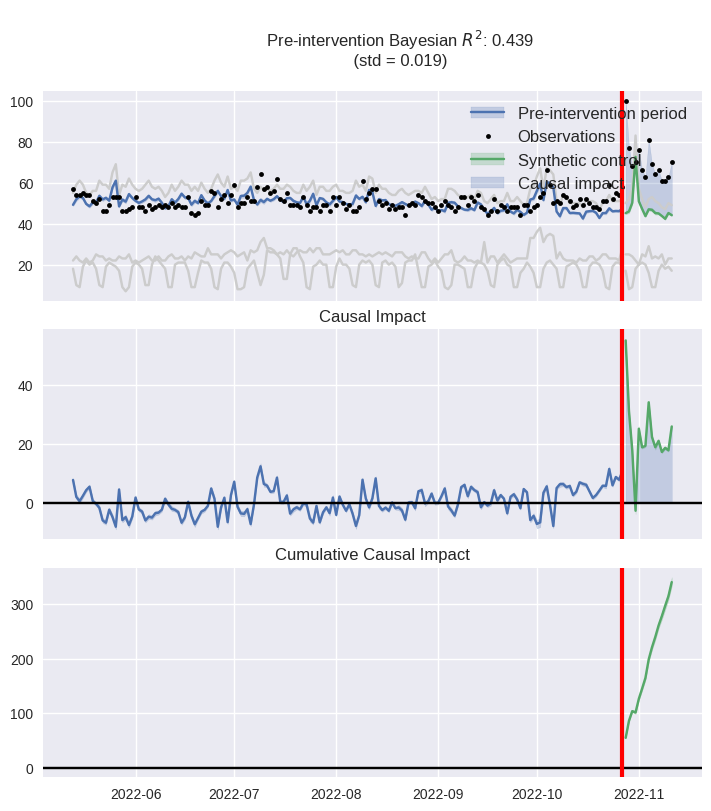

In [94]:
# Plot results
results.plot(plot_predictors=True)
plt.show()